<a href="https://colab.research.google.com/github/Kim-JH-01/AI_lab_Juhun/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==================================
# 1. 환경 설정
# ==================================
# PyTorch 환경 확인 및 FFmpeg 설치
try:
    import torch
    print(f"✅ PyTorch Version: {torch.__version__}")
    if not torch.cuda.is_available():
        print("    - ❌ CUDA is not available. Using CPU.")
except ImportError:
    print("❌ PyTorch is not installed.")

!apt-get -qq update && apt-get -qq install -y ffmpeg
print("✅ FFmpeg 설치 완료!")


# ==================================
# 2. 파일 업로드
# ==================================
from pathlib import Path
from google.colab import files

print("\n[파일 업로드 단계]")
print("아래 '파일 선택' 버튼을 눌러 컴퓨터에 있는 M4A 파일들을 선택해주세요.")
uploaded = files.upload()

# 업로드된 파일 경로를 input_filepaths 변수에 저장
input_filepaths = [Path(filename) for filename in uploaded.keys()]
print("\n✅ 다음 파일들이 Colab 환경에 업로드되었습니다:", [fp.name for fp in input_filepaths])

✅ PyTorch Version: 2.8.0+cu126
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ FFmpeg 설치 완료!

[파일 업로드 단계]
아래 '파일 선택' 버튼을 눌러 컴퓨터에 있는 M4A 파일들을 선택해주세요.


Saving 095522039.m4a to 095522039.m4a
Saving 095522040.m4a to 095522040.m4a
Saving 095522041.m4a to 095522041.m4a
Saving 095522042.m4a to 095522042.m4a

✅ 다음 파일들이 Colab 환경에 업로드되었습니다: ['095522039.m4a', '095522040.m4a', '095522041.m4a', '095522042.m4a']



--- 처리 시작: 095522039.m4a ---
  ✅ 로드 성공! (샘플링 레이트: 44100 Hz)


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

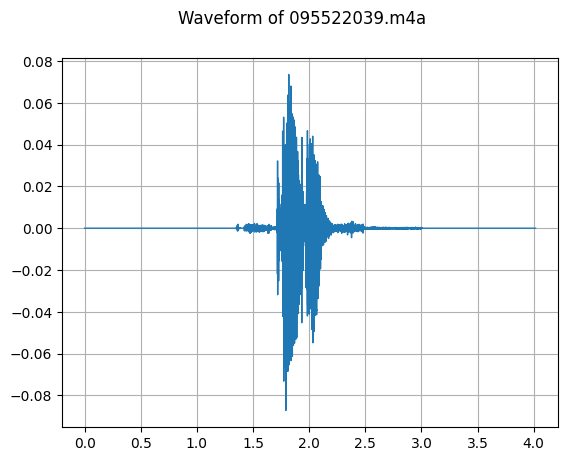

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


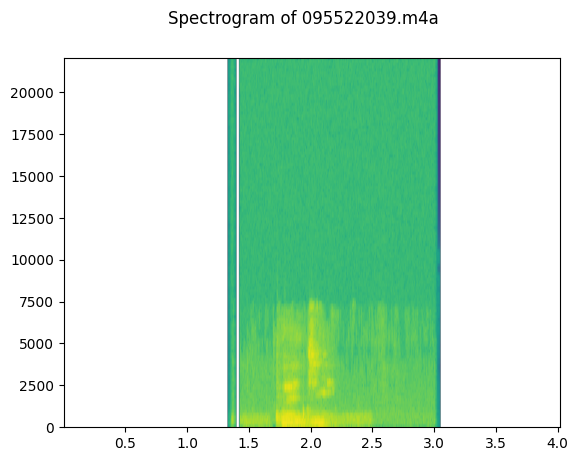


--- 처리 시작: 095522040.m4a ---
  ✅ 로드 성공! (샘플링 레이트: 44100 Hz)


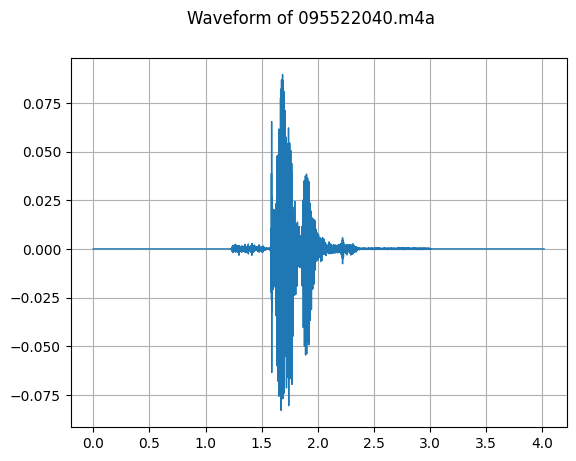

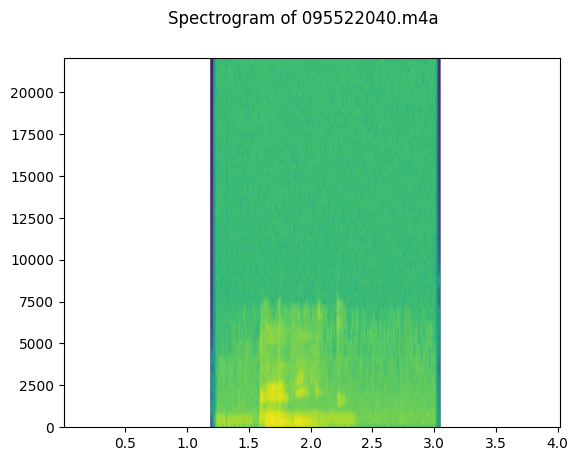


--- 처리 시작: 095522041.m4a ---
  ✅ 로드 성공! (샘플링 레이트: 44100 Hz)


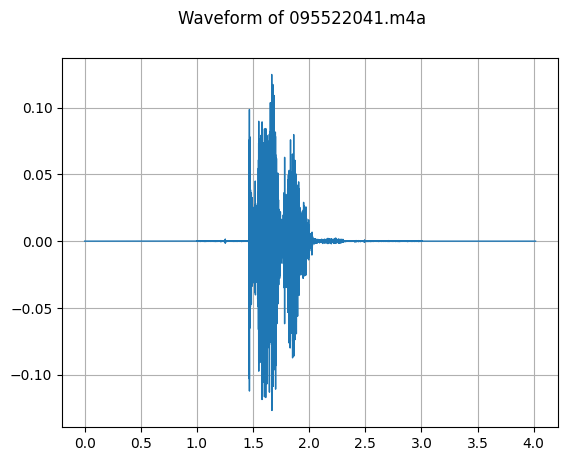

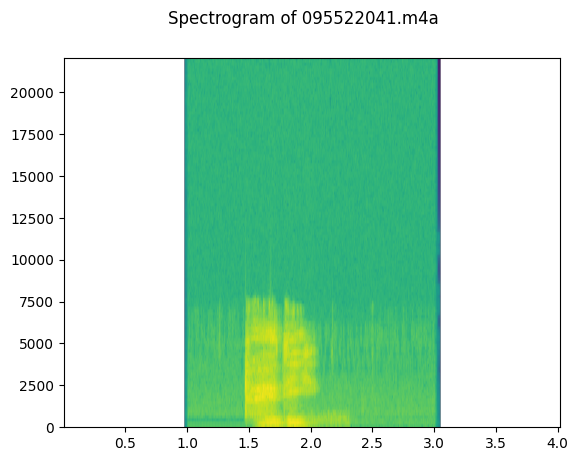


--- 처리 시작: 095522042.m4a ---
  ✅ 로드 성공! (샘플링 레이트: 44100 Hz)


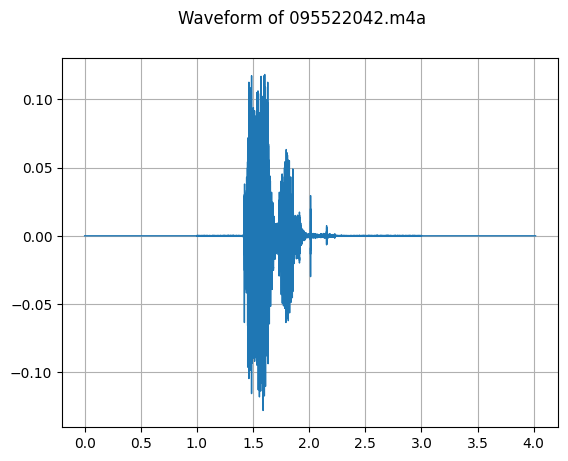

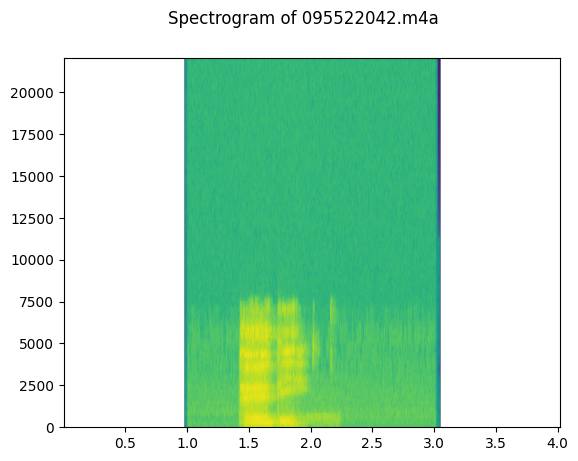

In [2]:
import torch
import torchaudio
import matplotlib.pyplot as plt


def plot_waveform(waveform, sample_rate, title="Waveform"):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show()

def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()
    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show()

if 'input_filepaths' in locals() and input_filepaths:
    for filepath in input_filepaths:
        print(f"\n--- 처리 시작: {filepath.name} ---")
        try:
            waveform, sample_rate = torchaudio.load(filepath)
            print(f"  ✅ 로드 성공! (샘플링 레이트: {sample_rate} Hz)")

            plot_waveform(waveform, sample_rate, title=f"Waveform of {filepath.name}")

            plot_specgram(waveform, sample_rate, title=f"Spectrogram of {filepath.name}")

        except Exception as e:
            print(f"에러 발생: {e}")
else:
    print("❌ 파일이 업로드되지 않았습니다. 첫 번째 셀을 먼저 실행하여 파일을 업로드해주세요.")

In [3]:
# ==================================
# 1. 필수 라이브러리 임포트
# ==================================
import torch
import torchaudio
import torchaudio.transforms as T
from pathlib import Path

# ==================================
# 2. 업로드된 파일 리샘플링
# ==================================
# 이전 셀에서 파일 업로드 후 'input_filepaths' 변수가 생성되었다고 가정합니다.
if 'input_filepaths' in locals() and input_filepaths:
    print("--- 업로드된 파일에 대한 리샘플링을 시작합니다 ---")

    for filepath in input_filepaths:
        print(f"\n--- 처리 시작: {filepath.name} ---")
        try:
            waveform, sample_rate = torchaudio.load(filepath)
            print(f"  - 원본 샘플링 레이트: {sample_rate} Hz")

            # --- 1/2배 다운샘플링 ---
            downsample_rate = sample_rate // 2
            downsampler = T.Resample(orig_freq=sample_rate, new_freq=downsample_rate)
            downsampled_waveform = downsampler(waveform)
            down_path = Path(f"downsampled_{filepath.name}")
            torchaudio.save(down_path, downsampled_waveform, sample_rate=downsample_rate)
            print(f"  ✅ 다운샘플링 완료: {down_path} ( {downsample_rate} Hz )")

            # --- 2배 업샘플링 ---
            upsample_rate = sample_rate * 2
            upsampler = T.Resample(orig_freq=sample_rate, new_freq=upsample_rate)
            upsampled_waveform = upsampler(waveform)
            up_path = Path(f"upsampled_{filepath.name}")
            torchaudio.save(up_path, upsampled_waveform, sample_rate=upsample_rate)
            print(f"  ✅ 업샘플링 완료: {up_path} ( {upsample_rate} Hz )")

        except Exception as e:
            print(f"❌ 에러 발생: {e}")
else:
    print("❌ 파일이 업로드되지 않았습니다. 파일 업로드 셀을 먼저 실행해주세요.")

--- 업로드된 파일에 대한 리샘플링을 시작합니다 ---

--- 처리 시작: 095522039.m4a ---
  - 원본 샘플링 레이트: 44100 Hz
  ✅ 다운샘플링 완료: downsampled_095522039.m4a ( 22050 Hz )


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:337: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.save_with_torchcodec` under the hood. Some parameters like format, encoding, bits_per_sample, buffer_size, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's encoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.encoders.AudioEncoder
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:247: UserWarning: torio.io._streaming_media_encoder.StreamingMediaEncoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  s 

  ✅ 업샘플링 완료: upsampled_095522039.m4a ( 88200 Hz )

--- 처리 시작: 095522040.m4a ---
  - 원본 샘플링 레이트: 44100 Hz
  ✅ 다운샘플링 완료: downsampled_095522040.m4a ( 22050 Hz )
  ✅ 업샘플링 완료: upsampled_095522040.m4a ( 88200 Hz )

--- 처리 시작: 095522041.m4a ---
  - 원본 샘플링 레이트: 44100 Hz
  ✅ 다운샘플링 완료: downsampled_095522041.m4a ( 22050 Hz )
  ✅ 업샘플링 완료: upsampled_095522041.m4a ( 88200 Hz )

--- 처리 시작: 095522042.m4a ---
  - 원본 샘플링 레이트: 44100 Hz
  ✅ 다운샘플링 완료: downsampled_095522042.m4a ( 22050 Hz )
  ✅ 업샘플링 완료: upsampled_095522042.m4a ( 88200 Hz )
